### Eigenvalues and Eigenvectors


#### Eigenvector
An eigenvector or characteristic vector is a vector that has its direction unchanged (or reversed) by a given linear transformation. More precisely, an eigenvector $v$ of a linear transformation $T$ is scaled by a constant factor $\lambda$, when the linear transformation is applied to it: $T(v) = \lambda v$ . 

#### Eigenvalue
In the above case `λ` is the eigenvalue for this eigenvector $v$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize_transformed_vector(A: list[list[int]], vec: list[int]):
    """
    Shows the vector (starting at (0; 0)) before and after the transformation
    given by the specified matrix.
    """
    vec_t = [A[0][0]*vec[0] + A[0][1]*vec[1], A[1][0]*vec[0] + A[1][1]*vec[1]]
    zeroes = [0, 0] 
    plt.quiver(zeroes, zeroes, [vec[0], vec_t[0]], [vec[1], vec_t[1]], angles="xy", scale_units="xy", scale=1, color = ["r", "b"])

    # Determine the range of the grid to be plotted.
    min_v = min(vec[0], vec[1], vec_t[0], vec_t[1])
    max_v = max(vec[0], vec[1], vec_t[0], vec_t[1])
    max_v = max(abs(min_v), abs(max_v))
    plt.xlim(-max_v, max_v)
    plt.ylim(-max_v, max_v)

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

Now have a look at the matrix given below:
$$ T = \begin{bmatrix}
2 & -4 \\
-1 & -1
\end{bmatrix} $$

See how the transformation acts on a arbitrary vector:

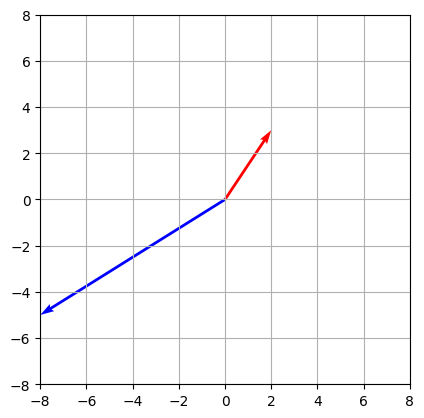

In [3]:
matrix = np.array([[2, -4], [-1, -1]])
visualize_transformed_vector(matrix, [2, 3])

Well, it... transforms it somehow. Let's try another vector:

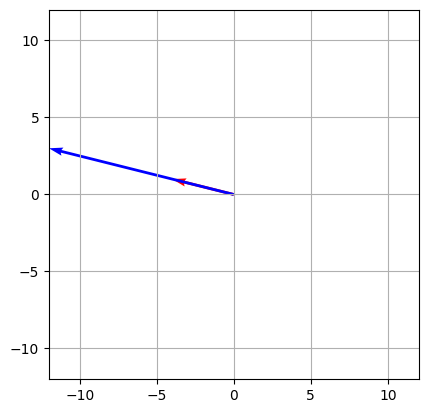

In [4]:
visualize_transformed_vector(matrix, [-4, 1])

Hm... the vector should be **scaled only**. That is, the entire matrix multiplication acts like a scalar multiplication for this special vector. Because it's so special, it's given a name - it's an **eigenvector** of that matrix. The factor which scales it is called an **eigenvalue** corresponding to that eigenvector.

More formally, a vector $v$ is an eigenvector of the matrix $A$, corresponding to the eigenvalue $\lambda$ if
$$ Av = \lambda v $$

You can find more details about the computation [here](https://sites.calvin.edu/scofield/courses/m256/materials/eigenstuff.pdf).

Why are these useful? For example, all of quantum physics is based on eigenvalues and eigenvectors. Also, it's very useful in **dimensionality reduction** problems. If you wish, you can explore that (for example, the **principal component analysis** algorithm).

### Exercise
**Find the eigenvalues** of the matrix $A = \begin{bmatrix}2 & 2 \\5 & -1 \end{bmatrix}$

The eigenvalues are those $\lambda$ for which $det(A − \lambda I)= 0$. Now:

$$ det(A − \lambda I) = det(\begin{bmatrix}2 & 2 \\5 & -1 \end{bmatrix} - \lambda \begin{bmatrix}1 & 0 \\0 & 1 \end{bmatrix}) $$
$$ = det(\begin{bmatrix}2 & 2 \\5 & -1 \end{bmatrix} - \begin{bmatrix}\lambda & 0 \\0 & \lambda \end{bmatrix}) $$
$$ = \begin{vmatrix}2- \lambda & 2 \\5 & -1- \lambda \end{vmatrix}$$
$$ = (2 - \lambda ) (-1 - \lambda ) - 10 $$
$$ = \lambda ^ 2 - \lambda - 12$$

The eigenvalues of $A$ are the solutions of the quadratic equation $ \lambda ^ 2 − \lambda − 12 = 0 $, namely $\lambda _1 = −3$ and $ \lambda _2 = 4$.

---

Now **find one of the corresponding eigenvectors** for $ \lambda  = -3$. The equation $Ax = \lambda x$ becomes $Ax = −3x$:

$$  x = \begin{bmatrix} x_1 \\x_2 \lambda \end{bmatrix} $$

$$ \begin{bmatrix}2x_1 + 2x_2 \\5x_1 - x_2 \lambda \end{bmatrix} = \begin{bmatrix} -3x_1 \\-3x_2 \lambda \end{bmatrix}$$

$$ \begin{cases}
    2x_1 + 2x_2 = 3x_1 \\
    5x_1 - x_2 = -3x_2
\end{cases}$$

$$ x_1 = \frac{-2}{5}x_2 $$

This means that, while there are infinitely many nonzero solutions (solution vectors) of the equation $Ax = −3x$, they all satisfy the condition that the first entry $x_1$ is $−2/5$ times the second entry $x_2$. Thus all solutions of this equation can be characterized by

$$
\begin{bmatrix} 2t \\-5t \end{bmatrix} = t \begin{bmatrix} 2 \\-5 \end{bmatrix} 
$$

where $t$ is any real number. The nonzero vectors $x$ that satisfy $Ax = −3x$ are called `eigenvectors` associated with the eigenvalue $ \lambda = -3$ . One such `eigenvector` is:
$$ u_1 = \begin{bmatrix} 2 \\-5 \end{bmatrix}  $$

Similarly, we can find eigenvectors associated with the eigenvalue $λ = 4$ by solving $Ax = 4x$ :

$$ u_2 = \begin{bmatrix} 1 \\1 \end{bmatrix}  $$

---
Now, let's see how to compute eigenvalues and eigenvectors using `numpy`.

In [5]:
A = np.array([[2, 2], [5, -1]])
eigenvalues, eigenvectors = np.linalg.eig(A)
eig_v1 = eigenvectors[:, 0]
eig_v2 = eigenvectors[:, 1]
print("eigenvalues:", eigenvalues)
print("eig_v1:", eig_v1)
print("eig_v2:", eig_v2)

eigenvalues: [ 4. -3.]
eig_v1: [0.70710678 0.70710678]
eig_v2: [-0.37139068  0.92847669]


### Eigenbasis
An **eigenbasis** is a basis in which every vector is an **eigenvector**. In the example above it is:

$$ \begin{Bmatrix} \begin{pmatrix} 2 \\-5 \end{pmatrix}, \begin{pmatrix} 1 \\1 \end{pmatrix} \end{Bmatrix}  $$

A matrix is *diagonalisable* (essentially) if an eigenbasis exists. If not, you need to resort to the more general [Jordan normal form](https://en.wikipedia.org/wiki/Jordan_normal_form) and [generalised](https://en.wikipedia.org/wiki/Generalized_eigenvector) eigenvectors/eigenbases.

### Spectrum of a matrix
In mathematics, the spectrum of a matrix is the set of its **eigenvalues**.

### Projection
A projection is a linear transformation $P$ from a vector space to itself (an endomorphism) such that $P∘P=P$. That is, whenever $P$ is applied twice to any vector, it gives the same result as if it were applied once (i.e. $P$ is idempotent). It leaves its image unchanged.

### Projection Matrix
A projection matrix is a matrix used in linear algebra to map vectors onto a subspace, typically in the context of vector spaces or 3D computer graphics. It has the following main applications.

A matrix $P$ is a projection matrix if:

1. $P^2 = P$ (idempotent property).
2. $P$ is square ($n × n$).

This means applying the projection matrix twice is the same as applying it once. Essentially, the projection does not change after the first application.


#### Examples of Projection Matrices
Some common examples of projection matrices are:
##### Projection onto a Subspace
Given a vector $v ∈ R^n$ and a subspace $U ⊂ R^n$, the projection of $v$ onto $U$ can be computed using the projection matrix $P$. If $A$ is a matrix whose columns form an **orthonormal** basis for $U$, the projection matrix $P$ is $P = AA^T$.
* For example, if $A = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$, then  $P = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$, which projects every vector onto itself (identity matrix).

##### Projection in Principal Component Analysis (PCA)
In PCA, high-dimensional data is projected onto a subspace spanned by the top k eigenvectors (principal components) of the covariance matrix:
$P = U_kU_k^T$ 

Where:
* $U_k$​ is a matrix containing the top $k$ eigenvectors as its columns.

This projection reduces the dimensionality of the data while retaining maximum variance.

### Vector Projection 
The projection vector is a vector that represents the shadow of one vector cast on another vector. Obtaining the vector projection of one vector over another involves multiplying the given vector by the cosecant of the angle separating the two vectors in the equation.

### Reference
* [Introduction to projections | Matrix transformations](https://www.youtube.com/watch?v=27vT-NWuw0M)
* [Vector projection](https://unacademy.com/content/jee/study-material/mathematics/vector-projection/)
* [Projection Matrix](https://unacademy.com/content/jee/study-material/mathematics/vector-projection/)